In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette="muted")
%matplotlib inline

import sklearn
from sklearn import datasets
import sklearn.model_selection
from sklearn.linear_model import LinearRegression

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Num Casas')

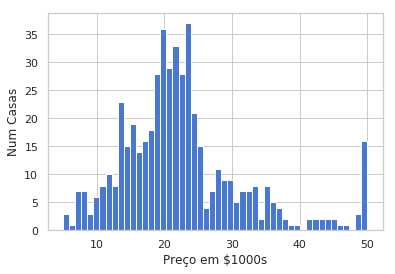

In [3]:
plt.hist(boston.target,bins=50)
plt.xlabel('Preço em $1000s')
plt.ylabel('Num Casas')

Text(0.5, 0, 'Num Quartos')

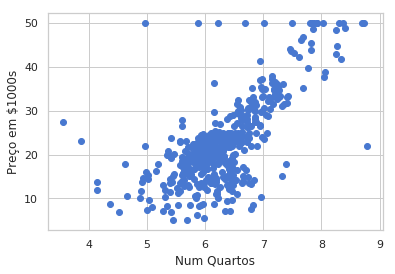

In [4]:
plt.scatter(boston.data[:,5],boston.target)
plt.ylabel('Preço em $1000s')
plt.xlabel('Num Quartos')

In [5]:
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/home/rafael/.virtualenvs/alura-ml-101/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


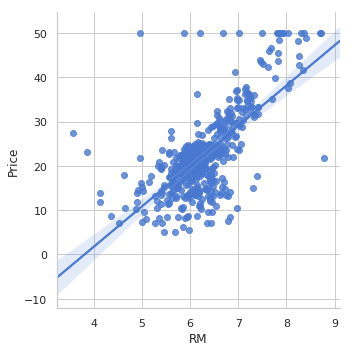

In [6]:
sns.lmplot('RM','Price',data = boston_df)

In [7]:
X = boston_df.drop('Price', 1)
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, boston_df.Price, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [8]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

print("MSE com Y_train: %.2f" % sklearn.metrics.mean_squared_error(Y_train, pred_train))

print("MSE com X_test e Y_test: %.2f" % sklearn.metrics.mean_squared_error(Y_test, pred_test))

MSE com Y_train: 22.34
MSE com X_test e Y_test: 22.10


Para entender o MSE (Erro Quadrado Médio) [Wikipedia](https://en.wikipedia.org/wiki/Mean_squared_error)

![](http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png)

> $ MSE = \frac{1}{n}\sum_{i=1}^n(Y_i-\hat{Y_i})^2$

Onde:
- *n* é a quantidade de amostras
- *Y* é a variavel target real
- $\hat{Y}$ é o target predito pelo modelo

Uma métrica mais clara para os casos de regressão pé o [R2 score](http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score)

In [9]:
from sklearn.metrics import r2_score

print("R2 score no conjunto de testes: %.2f" % r2_score(Y_test, pred_test))

print("R2 score no conjunto de treinamento: %.2f" % r2_score(Y_train, pred_train))

R2 score no conjunto de testes: 0.68
R2 score no conjunto de treinamento: 0.75
